# FACTS of the FIFA World Cup dataset



We'll take data frfom the file `fifa_world_cup.csv`

In [1]:
#!/usr/bin/env python3
## SFSU, 2022
## Robert Harakaly
## File description:
## GroupProject, Fifa WorldCup
##

import pandas as pd
import numpy as np
from math import *
from collections import Counter

file = "../doc/sport/fifa_world_cup.csv"
data = pd.read_csv(file)

## 1- Who Scored the most Goals ? And 2- Which team have the best goal frequency per games ?



In [2]:
def max_goal(type):
    if type == "sum":
        most_goal = pd.DataFrame(data.groupby(['home_team']).sum())
        most_goal_a = pd.DataFrame(data.groupby(['away_team']).sum())
    if type == "mean":
        most_goal = pd.DataFrame(data.groupby(['home_team']).mean())
        most_goal_a = pd.DataFrame(data.groupby(['away_team']).mean())
    most_goal = pd.DataFrame(most_goal.iloc[0:, [4]]).to_numpy()
    most_goal_a = pd.DataFrame(most_goal_a.iloc[0:, [5]]).to_numpy()
    tot = []
    for idx, i in enumerate(most_goal_a):
        if type == "sum":
            tot.append(int(i+most_goal[idx]))
        if type == "mean":
            tot.append(float((i+most_goal[idx])/2))
    country = data.groupby('home_team')['home_team'].apply(list)
    c = []
    for idx, i in enumerate(country):
        c.append(i[0])
    m_h = max(most_goal)
    m_a = max(most_goal_a)
    m = max(tot)
    j = 0
    j_h = 0
    j_a = 0
    for idx, i in enumerate(c):
        if tot[idx] == m:
            j = idx
        if most_goal[idx] == m_h:
            j_h = idx
        if most_goal_a[idx] == m_a:
            j_a = idx
    if type == "sum":
        print("Team that scored the most goals at Home is:", c[j_h], "with", m_h[0], "goals")
        print("Team that scored the most goals Away is:", c[j_a], "with", m_a[0], "goals")
        print("Team that scored the most goals Overall is:", c[j], "with", m, "goals")
    if type == "mean":
        print("Team that have the highest goals per match at Home is:", c[j_h], "with", m_h[0], "goals")
        print("Team that have the highest goals per match Away is:", c[j_a], "with", m_a[0], "goals")
        print("Team that have the highest goals per match overall is:", c[j], "with", m, "goals")
    return c

def who_scored_the_most_goals():
    c = max_goal("sum")
    print()
    max_goal("mean")
    return c

c = who_scored_the_most_goals()

Team that scored the most goals at Home is: USA with 589 goals
Team that scored the most goals Away is: Brazil with 396 goals
Team that scored the most goals Overall is: Brazil with 954 goals

Team that have the highest goals per match at Home is: New Caledonia with 2.6785714285714284 goals
Team that have the highest goals per match Away is: Vanuatu with 2.314814814814815 goals
Team that have the highest goals per match overall is: New Caledonia with 2.2582046332046333 goals


## 3- Which team have the cleaner sheet ?

In [3]:
def home_clean_sheet(home, team):
    clean_sheet = pd.DataFrame(data[data[home] == 0])
    clean_sheet = clean_sheet[team].to_numpy()
    cs = []
    for i in clean_sheet:
        cs.append(i)
    a = dict(Counter(cs))
    t = max(a, key=a.get)
    if team == 'home_team':
        tot_game = len(data[data['home_team'] == t])
        print("The team who have to most clean sheet at Home is:", t, "with", a[t], "clean sheets")
        print("This is", (a[t]/tot_game)*100, "% clean sheets")
    if team == 'away_team':
        tot_game = len(data[data['away_team'] == t])
        print("The team who have to most clean sheet Away is:", t, "with", a[t], "clean sheets")
        print("This is", (a[t]/tot_game)*100, "% clean sheets")
    return a, cs, tot_game

def clean_sheet(c):
    a_h, cs, tot_game_h = home_clean_sheet("away_team_score", "home_team")
    a_a, cs, tot_game_a = home_clean_sheet("home_team_score", "away_team")
    tot = []
#    tot_game = tot_game_h + tot_game_a
    for idx, i in enumerate(cs):
        try:
            tot.append(a_h[i]+a_a[i])
        except:
            continue
    m = max(tot)
    j = 0
    for idx, i in enumerate(cs):
        if m == tot[idx]:
            j = idx
            break
    tot_game = len(data[(data['home_team'] == cs[j]) | (data['away_team'] == cs[j])])
    print("The team who have to most clean sheet overall is:", cs[j], "with", m, "clean sheets")
    print("This is", (m/tot_game)*100, "% clean sheets")

clean_sheet(c)

The team who have to most clean sheet at Home is: USA with 152 clean sheets
This is 48.40764331210191 % clean sheets
The team who have to most clean sheet Away is: Zambia with 96 clean sheets
This is 39.50617283950617 % clean sheets
The team who have to most clean sheet overall is: Brazil with 229 clean sheets
This is 52.88683602771363 % clean sheets


## 4- Is it an advantage to play at Home ?

In [4]:
def Home_or_Away():
    global data
    print()
    win = (len(data[data['home_team_result'] == 'Win'])/(len(data))*100)
    lose = (len(data[data['home_team_result'] == 'Lose'])/(len(data))*100)
    draw = (len(data[data['home_team_result'] == 'Draw'])/(len(data))*100)
    print("The team at home have:", win, "% chances to win")
    print("The away team have:", lose, "% chances to win")
    print("There is", draw, "% chances to have a draw")

Home_or_Away()


The team at home have: 49.166004765687056 % chances to win
The away team have: 28.305672839764224 % chances to win
There is 22.528322394548724 % chances to have a draw


## 5- Which team won the most games ?

In [5]:
def who_win_the_most(c, team, score):
    global data
    win = []
    for i in c:
        win.append(len(data[(data[team] == i) & (data['home_team_result'] == score)]))
    m = max(win)
    j = 0
    for idx, i in enumerate(win):
        if m == i:
            j = idx
    tot_game = len(data[data[team] == c[j]])
    if team == 'home_team':
        print("The team who won the most of match is:", c[j], "with", m, "victory at Home which is", m/tot_game*100, "% victory")
    if team == 'away_team':
        print("The team who won the most of match is:", c[j], "with", m, "victory Away which is", m/tot_game*100, "% victory")
    return win


def best_country(c):
    win_h = who_win_the_most(c, 'home_team', "Win")
    win_a = who_win_the_most(c, 'away_team', "Lose")
    win = []
    for idx, i in enumerate(win_h):
        win.append(i + win_a[idx])
    m = max(win)
    j = 0
    for idx, i in enumerate(win):
        if m == i:
            j = idx
    tot_game = len(data[(data['home_team'] == c[j]) | (data['away_team'] == c[j])])
    print("The team who won the most of match is:", c[j], "with", m, "victory Overall which is", m/tot_game*100, "% victory")

best_country(c)

The team who won the most of match is: USA with 194 victory at Home which is 61.78343949044586 % victory
The team who won the most of match is: Brazil with 120 victory Away which is 60.0 % victory
The team who won the most of match is: Brazil with 301 victory Overall which is 69.5150115473441 % victory


In [6]:
GroupA = {"Qatar":0, "Ecuador":0, "Senegal":0, "Netherlands":0}
GroupB = {"England":0, "IR Iran":0, "USA":0, "Wales":0}
GroupC = {"Argentina":0, "Saudi Arabia":0, "Mexico":0, "Poland":0}
GroupD = {"Australia":0, "France":0, "Denmark":0, "Tunisia":0}
GroupE = {"Spain":0, "Germany":0, "Japan":0, "Costa Rica":0}
GroupF = {"Belgium":0, "Canada":0, "Morocco":0, "Croatia":0}
GroupG = {"Brazil":0, "Serbia":0, "Switzerland":0, "Cameroon":0}
GroupH = {"Portugal":0, "Ghana":0, "Uruguay":0, "Korea Republic":0}

GROUP = [GroupA, GroupB, GroupC, GroupD, GroupE, GroupF, GroupG, GroupH]

## 6- Does the Fifa Ranking really matters ?

In this part, we want to know if the Fifa Ranking can really give us information who is more likely to win the game.

The outputs can clearly show us that the Ranking can be a good way to see which team will win. We an also see with this code that playing at Home or Away really matters. <br>
`Win HOME: World class against AWAY: Really Good 	 57.99648506151143`<br>
`Lose HOME: World class against AWAY: Really Good 	 19.507908611599298`<br>
`Draw HOME: World class against AWAY: Really Good 	 22.495606326889277`<br><br>
`Win HOME: Really Good against AWAY: World class 	 29.282868525896415`<br>
`Lose HOME: Really Good against AWAY: World class 	 42.03187250996016`<br>
`Draw HOME: Really Good against AWAY: World class 	 28.68525896414343`<br><br>
We can see that the World Class team have 19% chances to loose at Home but have 29% to loose Away against a Good team.

In [7]:
def rank(team1 = None, team2 = None):
    r = data.loc[:len(data), ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_result']]
    bins = [0, 10, 30, 40, 70, 100, 211]
    ranking = ["World class", "Really Good", "Average", "Bad", "Really Bad", "Worst"]
    r["home ranking"] = pd.cut(x=data['home_team_fifa_rank'], bins=bins, labels=ranking)
    r["away ranking"] = pd.cut(x=data['away_team_fifa_rank'], bins=bins, labels=ranking)
    rr = r.loc[:len(r), ['home ranking', 'away ranking', 'home_team_result']]
    win_rate = []
    for g1 in ranking:
        for g2 in ranking:
            game = rr[((rr["home ranking"] == g1) & (rr["away ranking"] == g2))]
            nb_games = len(rr[((rr["home ranking"] == g1) & (rr["away ranking"] == g2))])
            for g in ["Win", "Lose", "Draw"]:
                if team1 != None and team2 != None and team1 == g1 and team2 == g2 or team1 == None and team2 == None:
                    win_rate.append(len(game[game["home_team_result"] == g]) / nb_games * 100)
                    print(g, "HOME:", g1, "against AWAY:", g2, "\t", (len(game[game["home_team_result"] == g]) / nb_games * 100))
            if team1 != None and team2 != None and team1 == g1 and team2 == g2:
                return win_rate
            print()

print(rank("World class", "Bad"))
print()
rank()




Win HOME: World class against AWAY: Bad 	 74.3142144638404
Lose HOME: World class against AWAY: Bad 	 7.4812967581047385
Draw HOME: World class against AWAY: Bad 	 18.204488778054863
[74.3142144638404, 7.4812967581047385, 18.204488778054863]

Win HOME: World class against AWAY: World class 	 43.626062322946176
Lose HOME: World class against AWAY: World class 	 32.01133144475921
Draw HOME: World class against AWAY: World class 	 24.362606232294617

Win HOME: World class against AWAY: Really Good 	 57.99648506151143
Lose HOME: World class against AWAY: Really Good 	 19.507908611599298
Draw HOME: World class against AWAY: Really Good 	 22.495606326889277

Win HOME: World class against AWAY: Average 	 66.66666666666666
Lose HOME: World class against AWAY: Average 	 12.444444444444445
Draw HOME: World class against AWAY: Average 	 20.88888888888889

Win HOME: World class against AWAY: Bad 	 74.3142144638404
Lose HOME: World class against AWAY: Bad 	 7.4812967581047385
Draw HOME: World cl

In [8]:
def max_goal(type):
    if type == "sum":
        most_goal = pd.DataFrame(data.groupby(['home_team']).sum())
        most_goal_a = pd.DataFrame(data.groupby(['away_team']).sum())
    if type == "mean":
        most_goal = pd.DataFrame(data.groupby(['home_team']).mean())
        most_goal_a = pd.DataFrame(data.groupby(['away_team']).mean())
    most_goal = pd.DataFrame(most_goal.iloc[0:, [4]]).to_numpy()
    most_goal_a = pd.DataFrame(most_goal_a.iloc[0:, [5]]).to_numpy()
    tot = []
    for idx, i in enumerate(most_goal_a):
        if type == "sum":
            tot.append(int(i+most_goal[idx]))
        if type == "mean":
            tot.append(float((i+most_goal[idx])/2))
    country = data.groupby('home_team')['home_team'].apply(list)
    c = []
    for idx, i in enumerate(country):
        c.append(i[0])
    m_h = max(most_goal)
    m_a = max(most_goal_a)
    m = max(tot)
    j = 0
    j_h = 0
    j_a = 0
    for idx, i in enumerate(c):
        if tot[idx] == m:
            j = idx
        if most_goal[idx] == m_h:
            j_h = idx
        if most_goal_a[idx] == m_a:
            j_a = idx
    # if type == "sum":
    #     print("Team that scored the most goals at Home is:", c[j_h], "with", m_h[0], "goals")
    #     print("Team that scored the most goals Away is:", c[j_a], "with", m_a[0], "goals")
    #     print("Team that scored the most goals Overall is:", c[j], "with", m, "goals")
    # if type == "mean":
    #     print("Team that have the highest goals per match at Home is:", c[j_h], "with", m_h[0], "goals")
    #     print("Team that have the highest goals per match Away is:", c[j_a], "with", m_a[0], "goals")
    #     print("Team that have the highest goals per match overall is:", c[j], "with", m, "goals")
    return c

def who_scored_the_most_goals():
    c = max_goal("sum")
    print()
    max_goal("mean")
    return c

def who_win_the_most2(c, team, score, data):
#    global data
    win = []
    for i in c:
        win.append(len(data[(data[team] == i) & (data['home_team_result'] == score)]))
    m = max(win)
    j = 0
    for idx, i in enumerate(win):
        if m == i:
            j = idx
    tot_game = len(data[data[team] == c[j]])
    # if team == 'home_team':
    #     print("The team who won the most of match is:", c[j], "with", m, "victory at Home which is", m/tot_game*100, "% victory")
    # if team == 'away_team':
    #     print("The team who won the most of match is:", c[j], "with", m, "victory Away which is", m/tot_game*100, "% victory")
    return win

def best_country(c, data):
    win_h = who_win_the_most2(c, 'home_team', "Win", data)
    win_a = who_win_the_most2(c, 'away_team', "Lose", data)
    lose_h = who_win_the_most2(c, 'home_team', "Lose", data)
    lose_a = who_win_the_most2(c, 'away_team', "Win", data)
    draw_h = who_win_the_most2(c, 'home_team', "Draw", data)
    draw_a = who_win_the_most2(c, 'away_team', "Draw", data)
    win = []
    lose = []
    draw = []
    for idx, i in enumerate(win_h):
        win.append(i + win_a[idx])
        lose.append(lose_h[idx] + lose_a[idx])
        draw.append(draw_h[idx] + draw_a[idx])
    m = max(win)
    j = 0
    for idx, i in enumerate(win):
        if m == i:
            j = idx
#    tot_game = len(data[(data['home_team'] == c[j]) | (data['away_team'] == c[j])])
#    print("The team who won the most of match is:", c[j], "with", m, "victory Overall which is", m/tot_game*100, "% victory")
    return win, lose, draw

def data_for_a_certain_y(y, data):
#    global data
    for idx, d in enumerate(data["date"]):
        if str(2022-y) == d[:4]:
            pastYearsData = data.iloc[1+idx:, 0:]
#    print(pastYearsData)
    return pastYearsData

def new_df(c, w, l, d, df, bl, y):
    percent_w = []
    percent_l = []
    percent_d = []
    tot = []
    for idx, i in enumerate(c):
        tot.append(w[idx]+l[idx]+d[idx])
        try:
            percent_w.append(w[idx]/(tot[idx])*100)
            percent_l.append(l[idx]/(tot[idx])*100)
            percent_d.append(d[idx]/(tot[idx])*100)
        except:
            percent_w.append("NaN")
            percent_l.append("NaN")
            percent_d.append("NaN")
    if bl == False:
        data2 = {'TEAM': c,
        'WIN': w,
        'LOSE': l,
        'DRAW': d,
        'PLAY': tot
#            '% WIN': percent_w, '% LOSE': percent_l, '% DRAW': percent_d
        }
        df = pd.DataFrame(data2)
    else:
        df["last " + str(y) + "y WIN"] = w
        df["last " + str(y) + "y LOSE"] = l
        df["last " + str(y) + "y DRAW"] = d
        df["last " + str(y) + "y PLAY"] = tot
        # df["last " + str(y) + "y % WIN"] = percent_w
        # df["last " + str(y) + "y % LOSE"] = percent_l
        # df["last " + str(y) + "y % DRAW"] = percent_d
    return df

c = who_scored_the_most_goals()
w, l, d = best_country(c, data)
df = new_df(c, w, l, d, None, False, 0)
pastYearsData = data_for_a_certain_y(5, data)
p_w, p_l, p_d = best_country(c, pastYearsData)
df = new_df(c, p_w, p_l, p_d, df, True, 5)
pastYearsData = data_for_a_certain_y(2, data)
p_w, p_l, p_d = best_country(c, pastYearsData)
df = new_df(c, p_w, p_l, p_d, df, True, 2)
lst = list(df.iloc[0])
#print(len(df))
pts_A = []
pts_N = []
for idx in range(0, len(df)):
    lst = list(df.iloc[idx])
#        print(lst[0], "\tAVERAGE", lst[5]*3+lst[7], "\tNOW", lst[9]*3+lst[11])
    if lst[8] != 0:
        pts_A.append(((lst[5]*3+lst[7])/lst[8])*100)
    else:
        pts_A.append(1)
    if lst[12] != 0:
#            print(lst[12], ((lst[9]*3+lst[11])/lst[12])*100)
        pts_N.append(((lst[9]*3+lst[11])/lst[12])*100)
    else:
        pts_N.append(0)
df["Last pts"] = pts_A
df["Now pts"] = pts_N
stats = []
s = []
for idx, i in enumerate(pts_A):
    if i != 0:
        stats.append(pts_N[idx] / i)
        s.append('Cold' if stats[idx] < 0.9 else 'Hot' if stats[idx] > 1.1 else 'Regular')
    else:
        stats.append(None)
        s.append(None)
df["forme"] = s
#print(df)
worldCup = []
for i in GROUP:
    worldCup.append(df.loc[df['TEAM'].isin(i)])
worldCup = pd.concat(worldCup)
print(worldCup[['TEAM', 'forme']])
#print(worldCup)


               TEAM    forme
59          Ecuador  Regular
134     Netherlands      Hot
154           Qatar  Regular
163         Senegal      Hot
62          England  Regular
89          IR Iran      Hot
198             USA      Hot
207           Wales     Cold
8         Argentina      Hot
124          Mexico  Regular
151          Poland  Regular
161    Saudi Arabia      Hot
11        Australia  Regular
55          Denmark      Hot
71           France     Cold
193         Tunisia      Hot
48       Costa Rica      Hot
75          Germany      Hot
97            Japan      Hot
174           Spain  Regular
19          Belgium     Cold
36           Canada  Regular
49          Croatia  Regular
129         Morocco      Hot
27           Brazil  Regular
35         Cameroon      Hot
164          Serbia      Hot
182     Switzerland      Hot
76            Ghana     Cold
102  Korea Republic      Hot
152        Portugal  Regular
202         Uruguay  Regular


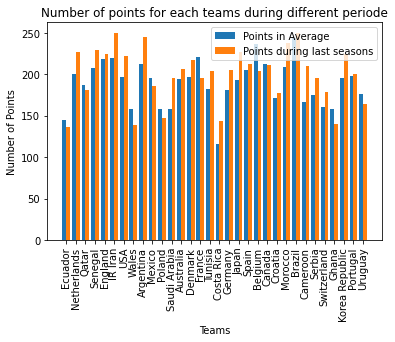

In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

X = list(worldCup['TEAM'])
X_axis = np.arange(len(X))
A = list(worldCup['Last pts'])
N = list(worldCup['Now pts'])

plt.bar(X_axis - 0.2, A, 0.4, label = 'Points in Average')
plt.bar(X_axis + 0.2, N, 0.4, label = 'Points during last seasons')
  
plt.xticks(X_axis, X)
plt.xlabel("Teams")
plt.ylabel("Number of Points")
plt.title("Number of points for each teams during different periode")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## 7- Win accruacy for all teams

In [10]:
dic = []

def what_rank(country):
    bins = [0, 10, 30, 40, 70, 100, 211]
    ranking = ["World class", "Really Good", "Average", "Bad", "Really Bad", "Worst"]
    rank = data[data['home_team'] == country]
    rank = pd.cut(x=rank.iloc[0:, 5], bins=bins, labels=ranking)
    rank = list(rank)
    return rank[-1]

def rank2H(country, team2, d):
    r = d.loc[0:, ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_result']]
    bins = [0, 10, 30, 40, 70, 100, 211]
    ranking = ["World class", "Really Good", "Average", "Bad", "Really Bad", "Worst"]
    r["home ranking"] = pd.cut(x=d['home_team_fifa_rank'], bins=bins, labels=ranking)
    r["away ranking"] = pd.cut(x=d['away_team_fifa_rank'], bins=bins, labels=ranking)
    rr = r.loc[0:, ['home_team', 'away ranking', 'home_team_result']]
    g2 = what_rank(team2)
    game = rr[((rr["home_team"] == country) & (rr["away ranking"] == g2))]
    nb_games = len(rr[((rr["home_team"] == country) & (rr["away ranking"] == g2))])
    return [nb_games, len(game[game["home_team_result"] == 'Win']), len(game[game["home_team_result"] == 'Lose']), len(game[game["home_team_result"] == 'Draw'])]

def rank2A(country, team2, d):
    r = d.loc[0:, ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_result']]
    bins = [0, 10, 30, 40, 70, 100, 211]
    ranking = ["World class", "Really Good", "Average", "Bad", "Really Bad", "Worst"]
    r["home ranking"] = pd.cut(x=d['home_team_fifa_rank'], bins=bins, labels=ranking)
    r["away ranking"] = pd.cut(x=d['away_team_fifa_rank'], bins=bins, labels=ranking)
    rr = r.loc[0:, ['away_team', 'home ranking', 'home_team_result']]
    g2 = what_rank(team2)
    game = rr[((rr["away_team"] == country) & (rr["home ranking"] == g2))]
    nb_games = len(rr[((rr["away_team"] == country) & (rr["home ranking"] == g2))])
    return [nb_games, len(game[game["home_team_result"] == 'Lose']), len(game[game["home_team_result"] == 'Win']), len(game[game["home_team_result"] == 'Draw'])]

def rank2(country, team2, d):
    home = rank2H(country, team2, d)
    away = rank2A(country, team2, d)
    try:
        win = ((home[1] + away[1]) / (home[0] + away[0])) * 100
        lose = ((home[2] + away[2]) / (home[0] + away[0])) * 100
        draw = ((home[3] + away[3]) / (home[0] + away[0])) * 100
    except:
##        print("GAME", home[0]+away[0])
        win = (home[1] + away[1])
        lose = (home[2] + away[2])
        draw = (home[3] + away[3])
#    print("COUNTRY:", country, " WIN AGAINST:", what_rank(team2), "With percentage of:", win)
#    print("COUNTRY:", country, " LOSE AGAINST:", what_rank(team2), "With percentage of:", lose)
#    print("COUNTRY:", country, " DRAW AGAINST:", what_rank(team2), "With percentage of:", draw)
    return [win, lose, draw]

def s_stat(i):
    win = 0
    lose = 0
    draw = 0
#    print(i)
    for j in i:
        win += j[0]
        lose += j[1]
        draw += j[2]
    if sum(i[0]) == 0 and sum(i[1]) != 0 or sum(i[1]) == 0 and sum(i[0]) != 0:
        win /= 1
        lose /= 1
        draw /= 1
    else:
        win /= len(i)
        lose /= len(i)
        draw /= len(i)
    return [win, lose, draw]

def against(s, s2, country1, country2):
    global dic
    st = []
    copy1 = s.copy()
    copy2 = s2.copy()
    tmp = s2[0]
    s2[0] = s2[1]
    s2[1] = tmp
    for i in [0, 1, 2]:
        if s[i] > s2[i]:
            st.append((s[i] - s2[i]) / 2)
            s[i] -= st[i]
            s2[i] += st[i]
        else:
            st.append((s2[i] - s[i]) / 2)
            s[i] += st[i]
            s2[i] -= st[i]
#    print(s, sum(s))
#    print(s2, sum(s2))
    # print(copy1, country1)
    # print(copy2, country2)
    if copy1[0] > copy2[0]:
        # print(country1, "has", s[0], "to win against", country2)
        # print(country1, "has", s[1], "to lose against", country2)
        # print(country1, "has", s[2], "to draw against", country2)
        p = dict(zip(['Win', 'Lose', 'Draw'], [s[0], s[1], s[2]]))
        dic.append(dict(zip(['Country', 'Against', 'Percentages'], [country1, country2, p])))
        p = dict(zip(['Win', 'Lose', 'Draw'], [s[1], s[0], s[2]]))
        dic.append(dict(zip(['Country', 'Against','Percentages'], [country2, country1, p])))
    else:
        p = dict(zip(['Win', 'Lose', 'Draw'], [s[1], s[0], s[2]]))
        dic.append(dict(zip(['Country', 'Against','Percentages'], [country2, country1, p])))
        p = dict(zip(['Win', 'Lose', 'Draw'], [s[0], s[1], s[2]]))
        dic.append(dict(zip(['Country', 'Against','Percentages'], [country1, country2, p])))
        # print(country2, "has", s[1], "to win against", country1)
        # print(country2, "has", s[0], "to lose against", country1)
        # print(country2, "has", s[2], "to draw against", country1)
    return copy1, copy2

def proba(country1, country2):
    # global dic
    # dic = []
    pastYearsData = data_for_a_certain_y(3, data)
    stat1 = []
    stat2 = []
    for i in [data, pastYearsData]:
        stat1.append(rank2(country1, country2, i))
#        print()
        stat2.append(rank2(country2, country1, i))
    s = s_stat(stat1)
    s2 = s_stat(stat2)
#    print(s)
#    print(s2)
    copy1, copy2 = against(s, s2, country1, country2)
    return stat1, copy1, country1, stat2, copy2, country2

stat1, copy1, country1, stat2, copy2, country2 = proba('France', 'Australia')
print(stat1)
print(copy1, country1)
#print(dic)
print('\n\n\n')






dic = []
pts9 = [['Win', 'Win', 'Win']]
pts0 = [['Lose', 'Lose', 'Lose']]
pts1 = [['Draw', 'Lose', 'Lose'], ['Lose', 'Draw', 'Lose'], ['Lose', 'Lose', 'Draw']]
pts2 = [['Draw', 'Draw', 'Lose'], ['Draw', 'Lose', 'Draw'], ['Lose', 'Draw', 'Draw']]
pts3 = [['Lose', 'Lose', 'Win'], ['Lose', 'Win', 'Lose'], ['Win', 'Lose', 'Lose'], ['Draw', 'Draw', 'Draw']]
pts4 = [['Win', 'Draw', 'Lose'], ['Draw', 'Win', 'Lose'], ['Win', 'Lose', 'Draw'], ['Draw', 'Lose', 'Win'], ['Lose', 'Draw', 'Win'], ['Lose', 'Win', 'Draw']]
pts5 = [['Win', 'Draw', 'Draw'], ['Draw', 'Win', 'Draw'], ['Draw', 'Draw', 'Win']]
pts6 = [['Win', 'Win', 'Lose'], ['Lose', 'Win', 'Win'], ['Win', 'Lose', 'Win']]
pts7 = [['Win', 'Win', 'Draw'], ['Draw', 'Win', 'Win'], ['Win', 'Draw', 'Win']]
pt = [pts0, pts1, pts2, pts3, pts4, pts5, pts6, pts7, pts9]

def Matches(GG):
    already_played = []
    for G in GG:
#    if list(G.keys()) == list(GroupD.keys()):
        for H in list(G.keys()):
            for A in list(G.keys()):
                if H == A:
                    continue
                already_played.append([H, A])
                if [A, H] in already_played:
                    continue
                proba(H, A)
#print('\n\n\n')
#print(dic)
Matches(GROUP)

def Prono(GG):
    point_nb = [0, 1, 2, 3, 4, 5, 6, 7, 9]
    most_likely = []
    overall_p = []
    for g_idx, g_loop in enumerate(GG):
#    print(g_loop)
        m_l = {'Country': '', 'points': -1, 'Proba': 0}
        most_likely = []
        for c in list(g_loop.keys()):
            win = 0
            m_l = {'Country': '', 'points': -1, 'Proba': 0}
            group = list(g_loop.keys())
            against = list(group)
            against.remove(c)
#    print(against)
            for idx33, poin in enumerate(pt):
                win = 0
                for idx, p in enumerate(poin):
                    w = 1
                    for idx2, pp in enumerate(p):
#                print(idx, idx2, c, pp, against[idx2], end=' ')
                        for d in dic:
                            if d['Country'] == c and d['Against'] == against[idx2]:
#                        print(d['Percentages'][pp])
                                w *= (d['Percentages'][pp])/100
                    win += w
                    if w*100 > m_l['Proba']:
                        m_l = {'Country': c, 'points': point_nb[idx33], 'Proba': w*100}
#            print(w*100)
                win *= 100
#        print(m_l)
#        print(c, win, point_nb[idx33])
            most_likely.append(m_l)
        overall_p.append(most_likely)
    print(overall_p)
    return overall_p


overall_p = Prono(GROUP)

[[73.68421052631578, 6.578947368421052, 19.736842105263158], [71.42857142857143, 14.285714285714285, 14.285714285714285]]
[72.55639097744361, 10.432330827067668, 17.01127819548872] France




[[{'Country': 'Qatar', 'points': 3, 'Proba': 19.655987625145162}, {'Country': 'Ecuador', 'points': 0, 'Proba': 9.336110031741072}, {'Country': 'Senegal', 'points': 9, 'Proba': 12.095525349670401}, {'Country': 'Netherlands', 'points': 6, 'Proba': 17.016216648671044}], [{'Country': 'England', 'points': 9, 'Proba': 19.826762709920555}, {'Country': 'IR Iran', 'points': 0, 'Proba': 22.61647307486022}, {'Country': 'USA', 'points': 6, 'Proba': 8.60849585918771}, {'Country': 'Wales', 'points': 3, 'Proba': 13.003421987568723}], [{'Country': 'Argentina', 'points': 9, 'Proba': 24.356129590561988}, {'Country': 'Saudi Arabia', 'points': 0, 'Proba': 32.037096279768456}, {'Country': 'Mexico', 'points': 6, 'Proba': 17.806851367358988}, {'Country': 'Poland', 'points': 3, 'Proba': 15.393084228654002}], [{'Country':

In [11]:
name_group = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
points = []
GROUP = []

def my_max(pts, d):
    tmp = 0
    index = -1
    for idx, i in enumerate(pts):
        tmp2 = 0
        if i > tmp:
            tmp = i
            index = idx
        elif i == tmp:
            if d[idx]['Proba'] > tmp2:
                tmp = i
                index = idx
    return tmp, index

for idx, i in enumerate(overall_p):
    pts = []
    countries = []
    for j in i:
        pts.append(j['points'])
#        print(j['Country'], j['points'], name_group[idx])
    for n in range(2):
        M, id = my_max(pts, i)
#        print("Qualified", i[id]['Country'], M)
        countries.append(i[id]['Country'],)
        pts.pop(id)
        i.pop(id)
    GROUP.append(countries)
print(GROUP)


[['Senegal', 'Netherlands'], ['England', 'USA'], ['Argentina', 'Mexico'], ['France', 'Denmark'], ['Spain', 'Germany'], ['Belgium', 'Croatia'], ['Brazil', 'Cameroon'], ['Portugal', 'Uruguay']]


In [12]:
import random


def t(g):
    global dic
    dic = []
    i = 0
    l = 1
    r = 0
    while 1:
        if i >= len(g) and r == 0:
            i = 0
            r = 1
            l = 0
        if i >= len(g) and r == 1:
            break
        if l == 1:
            team1 = g[i][0]
            team2 = g[i+1][1]
            print(g[i][0], "VS", g[i+1][1])
        else:
            team1 = g[i][1]
            team2 = g[i+1][0]
            print(g[i][1], "VS", g[i+1][0])
        proba(team1, team2)
        i += 2


def knock_out():
    global dic
    dic = []
    loop = list(range(0, len(GROUP)))
    loop2 = list(range(0, len(GROUP)))
    while len(loop) != 0:
        nb1 = random.choice(loop)
        loop.pop(loop.index(nb1))
        team1 = GROUP[nb1][0]
        nb2 = random.choice(loop2)
        while nb1 == nb2:
            nb2 = random.choice(loop2)
        loop2.pop(loop2.index(nb2))
        team2 = GROUP[nb2][1]
        print(team1, 'VS', team2)
        proba(team1, team2)

#knock_out()
t(GROUP)
print(dic)

Senegal VS USA
Argentina VS Denmark
Spain VS Croatia
Brazil VS Uruguay
Netherlands VS England
Mexico VS France
Germany VS Belgium
Cameroon VS Portugal
[{'Country': 'USA', 'Against': 'Senegal', 'Percentages': {'Win': 45.95517878126573, 'Lose': 25.298808124895082, 'Draw': 28.74601309383918}}, {'Country': 'Senegal', 'Against': 'USA', 'Percentages': {'Win': 25.298808124895082, 'Lose': 45.95517878126573, 'Draw': 28.74601309383918}}, {'Country': 'Argentina', 'Against': 'Denmark', 'Percentages': {'Win': 58.65783410138249, 'Lose': 18.15236175115207, 'Draw': 23.189804147465438}}, {'Country': 'Denmark', 'Against': 'Argentina', 'Percentages': {'Win': 18.15236175115207, 'Lose': 58.65783410138249, 'Draw': 23.189804147465438}}, {'Country': 'Spain', 'Against': 'Croatia', 'Percentages': {'Win': 60.42657231824878, 'Lose': 16.418009839724892, 'Draw': 23.15541784202633}}, {'Country': 'Croatia', 'Against': 'Spain', 'Percentages': {'Win': 16.418009839724892, 'Lose': 60.42657231824878, 'Draw': 23.1554178420

In [13]:
def who_is_qualified():
    global dic
    global GROUP
    i = 0
    qualified = []
    while i < len(dic):
        if dic[i]['Percentages']['Win'] > dic[i]['Percentages']['Lose']:
            qualified.append(dic[i]['Country'])
        else:
            qualified.append(dic[i]['Against'])
        i += 2

    GROUP = []
    print(len(qualified))
    qualified = np.reshape(qualified, (int(len(qualified)/2), 2))
    print(qualified)
    t(qualified)
    GROUP = qualified

while len(GROUP) != 2:
    who_is_qualified()



8
[['USA' 'Argentina']
 ['Spain' 'Brazil']
 ['Netherlands' 'France']
 ['Belgium' 'Portugal']]
USA VS Brazil
Netherlands VS Portugal
Argentina VS Spain
France VS Belgium
4
[['Brazil' 'Netherlands']
 ['Argentina' 'France']]
Brazil VS France
Netherlands VS Argentina


In [14]:
print(dic)
i = 0
qualified = []
while i < len(dic):
    if dic[i]['Percentages']['Win'] > dic[i]['Percentages']['Lose']:
#       print(dic[i]['Country'])
        qualified.append(dic[i]['Country'])
    else:
#        print(dic[i]['Against'])
        qualified.append(dic[i]['Against'])
#    print(dic[i]['Country'], dic[i]['Against'], dic[i]['Percentages']['Win'], dic[i]['Percentages']['Lose'])
    i += 2
print(qualified[0], "VS", qualified[1])
dic = []
stat1, copy1, country1, stat2, copy2, country2 = proba(qualified[0], qualified[1])
i = 0
qualified = []
if dic[i]['Percentages']['Win'] > dic[i]['Percentages']['Lose']:
#        print(dic[i]['Country'])
    qualified.append(dic[i]['Country'])
else:
#        print(dic[i]['Against'])
    qualified.append(dic[i]['Against'])
print("The WINNER is:", qualified[0])


[{'Country': 'France', 'Against': 'Brazil', 'Percentages': {'Win': 44.81778771252455, 'Lose': 27.045993361782834, 'Draw': 28.136218925692607}}, {'Country': 'Brazil', 'Against': 'France', 'Percentages': {'Win': 27.045993361782834, 'Lose': 44.81778771252455, 'Draw': 28.136218925692607}}, {'Country': 'Argentina', 'Against': 'Netherlands', 'Percentages': {'Win': 37.19423537461512, 'Lose': 36.27409054624244, 'Draw': 26.531674079142434}}, {'Country': 'Netherlands', 'Against': 'Argentina', 'Percentages': {'Win': 36.27409054624244, 'Lose': 37.19423537461512, 'Draw': 26.531674079142434}}]
France VS Argentina
The WINNER is: France


In [15]:
dic = []
stat1, copy1, country1, stat2, copy2, country2 = proba('Argentina', 'France')
print(dic)
dic = []
stat1, copy1, country1, stat2, copy2, country2 = proba('France', 'Argentina')
print(dic)

[{'Country': 'Argentina', 'Against': 'France', 'Percentages': {'Win': 36.85639753677728, 'Lose': 40.50510727725917, 'Draw': 22.63849518596354}}, {'Country': 'France', 'Against': 'Argentina', 'Percentages': {'Win': 40.50510727725917, 'Lose': 36.85639753677728, 'Draw': 22.63849518596354}}]
[{'Country': 'Argentina', 'Against': 'France', 'Percentages': {'Win': 36.85639753677729, 'Lose': 40.50510727725917, 'Draw': 22.63849518596354}}, {'Country': 'France', 'Against': 'Argentina', 'Percentages': {'Win': 40.50510727725917, 'Lose': 36.85639753677729, 'Draw': 22.63849518596354}}]
